# Tokenization

Breaking down a text into individual components (like words or sentences).

For example, tokenizing “The quick brown fox” would yield [“The”, “quick”, “brown”, “fox”].

In [1]:
import nltk

# nltk.download("punkt") # NLTK Punkt tokenizer for sentence splitting
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
nltk.__version__

'3.9.1'

## Word Tokenization

In [3]:
sentence = "The small boy ate the pancakes from the restaurant"

tokens = nltk.word_tokenize(sentence)

print(f'Tokens using word tokenize {tokens}')

Tokens using word tokenize ['The', 'small', 'boy', 'ate', 'the', 'pancakes', 'from', 'the', 'restaurant']


## Sentence Tokenization

In [4]:
article = '''Did you know that World War 1 brought German Shepherds to the Western Hemisphere? Rin Tin Tin was a German Shepherd rescued from WW1. They are some of the smartest dogs!'''

sentence_tokens = nltk.sent_tokenize(article)

print(f'Tokens using sent tokenize {sentence_tokens}')

Tokens using sent tokenize ['Did you know that World War 1 brought German Shepherds to the Western Hemisphere?', 'Rin Tin Tin was a German Shepherd rescued from WW1.', 'They are some of the smartest dogs!']


In [5]:
# More examples
from nltk.tokenize import word_tokenize, sent_tokenize

paragraph = "The small boy ate the pancakes from the restaurant. He didn't liked them, and the next thing he wanted to try is pizza. But that's too costly!"

print("Word tokenizer", word_tokenize(paragraph), end="\n\n")

print("Sentence tokenizer", sent_tokenize(paragraph))

Word tokenizer ['The', 'small', 'boy', 'ate', 'the', 'pancakes', 'from', 'the', 'restaurant', '.', 'He', 'did', "n't", 'liked', 'them', ',', 'and', 'the', 'next', 'thing', 'he', 'wanted', 'to', 'try', 'is', 'pizza', '.', 'But', 'that', "'s", 'too', 'costly', '!']

Sentence tokenizer ['The small boy ate the pancakes from the restaurant.', "He didn't liked them, and the next thing he wanted to try is pizza.", "But that's too costly!"]


---

# Part of Speech (POS) Tagging

Assigning grammatical labels to words, such as identifying “quick” as an adjective and “fox” as a noun.

In [6]:
import nltk
# nltk.download("averaged_perceptron_tagger")

nltk.download("averaged_perceptron_tagger_eng")

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [7]:
tokens

['The', 'small', 'boy', 'ate', 'the', 'pancakes', 'from', 'the', 'restaurant']

In [8]:
tags = nltk.pos_tag(tokens)

tags

[('The', 'DT'),
 ('small', 'JJ'),
 ('boy', 'NN'),
 ('ate', 'VBP'),
 ('the', 'DT'),
 ('pancakes', 'NNS'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('restaurant', 'NN')]

In [9]:
from nltk.tag import pos_tag

secret = "I am from United States, and you ?"

secret_tokens = nltk.word_tokenize(secret)

secret_tagged_tokens = pos_tag(secret_tokens)

secret_tagged_tokens

[('I', 'PRP'),
 ('am', 'VBP'),
 ('from', 'IN'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 (',', ','),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('?', '.')]

## Visualizing Parse Tree

In [10]:
!pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.8 MB/s eta 0:00:00


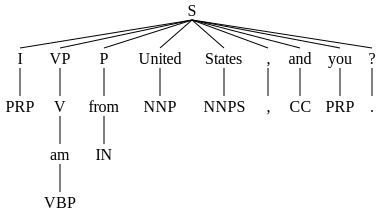

In [11]:
from nltk.chunk import RegexpParser

chunker = RegexpParser("""
  NP: {<DT>?<JJ>*<NN>} #To extract the Noun Phrases
  P: {<IN>} #To extract Prepositions
  V: {<V.*>} #To extract Verbs
  PP: {<P> <NP>} #To extract Prepositional Phrases
  VP: {<V> <NP|PP>*} #To extract Verb Phrases
""")

output = chunker.parse(secret_tagged_tokens)

output

> Additional resources

1. [NLTK chunking docs](https://www.nltk.org/howto/chunk.html)

2. [IBM Watson resource for POS tagging](https://www.ibm.com/docs/en/wca/3.5.0?topic=analytics-part-speech-tag-sets)

---

# Lemmatization and Stemming

Reducing words to their root forms, so “running” and “ran” become “run.”

1. `Stemming` is the process of reducing a word to its root form by chopping off prefixes or suffixes.

  - Stemming Example: "running" → "run"

---

2. `Lemmatization` is the process of converting a word to its base or dictionary form, considering its meaning and context.

  - Lemmatization Example: "better" → "good"

## Lemmatization

In [12]:
import nltk

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
lemmatizer = WordNetLemmatizer()

token = "stockings"

result_lemma = lemmatizer.lemmatize(token)

print(token, "=>", result_lemma)

stockings => stocking


---

### Let's lemmatize an entire sentence now

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('punkt_tab') # for tokenization

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()

sentence = "I am running to the store because I needed to buy some groceries."

tokens = word_tokenize(sentence)
print("Tokenized sentence:")
print(tokens)

# Lemmatize the tokenized sentences
lemmatized_tokens = ' '.join([lemmatizer.lemmatize(w) for w in tokens])
print("Lemmatized sentence:")
print(lemmatized_tokens)

Tokenized sentence:
['I', 'am', 'running', 'to', 'the', 'store', 'because', 'I', 'needed', 'to', 'buy', 'some', 'groceries', '.']
Lemmatized sentence:
I am running to the store because I needed to buy some grocery .


In [16]:
sentence = "I am running to the store because I needed to buy some groceries."

tokens = word_tokenize(sentence)

lemmatized_words = [
    lemmatizer.lemmatize(word, pos='v') if word != "I" else word for word in tokens
]

print("Lemmatized words:", lemmatized_words)

Lemmatized words: ['I', 'be', 'run', 'to', 'the', 'store', 'because', 'I', 'need', 'to', 'buy', 'some', 'groceries', '.']


> In lemmatization, we can specify the part of speech (POS) for **better accuracy**; in the above example, I specified `pos='v'` for verbs.

## Stemming

In [17]:
import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

sentence = "I am running to the store because I needed to buy some groceries."

words = nltk.word_tokenize(sentence)

# Apply stemming
stemmed_words = [stemmer.stem(word) for word in words]

print("Stemmed words:", stemmed_words)

Stemmed words: ['i', 'am', 'run', 'to', 'the', 'store', 'becaus', 'i', 'need', 'to', 'buy', 'some', 'groceri', '.']
